<a href="https://colab.research.google.com/github/EutruTepit/BigData2022/blob/main/%5BAula_08%5D_Agrupamento_e_aplica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 08 - Agrupamento e aplicações

## Importar bibliotecas importantes

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [128]:
# importar KMeans
from sklearn.cluster import KMeans

## Baixar dataset

Dataset disponível em: https://drive.google.com/file/d/11mOQ_STEd_JvKJDD8iVZX6YlnBfnyLKv/view?usp=sharing

## Carregar dados e visualizá-los

In [129]:
df = pd.read_csv('https://raw.githubusercontent.com/EutruTepit/BigData2022/main/datasets%20bdda/farmacia_exercicios.csv')
df.head()

,media_gasto_mes_farmacia,media_horas_mes_exercicios
0,9.383706,6.033871
1,12.856277,8.538815
2,11.367511,8.896491
3,9.872216,10.656140
4,15.883405,3.240659


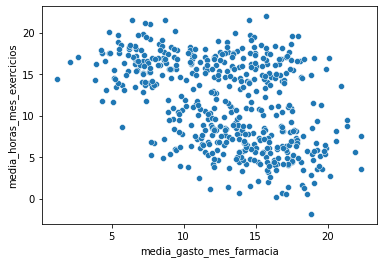

In [130]:
sns.scatterplot(data=df, x='media_gasto_mes_farmacia', y='media_horas_mes_exercicios');

## Detectar número ideal de clusters (de acordo com o *método do cotovelo*)

Capturar inertia de cada modelo com valor de k diferentes

In [131]:
inertias = list()

for i in range(2, 16):
  km = KMeans(n_clusters=i, random_state=0)
  km.fit(df)
  inertias.append( km.inertia_ )


Plotar inertias

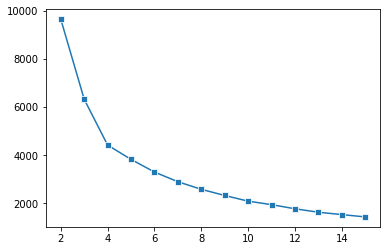

In [132]:
sns.lineplot(x=range(2, 2+len(inertias)), y=inertias, marker='s');

De acordo com o método do cotovelo: **k= 4**

## Plotar gráfico

* Analisar significados dos agrupamentos
* Aplicar modelo com o melhor **K** encontrado

In [133]:
km = KMeans(n_clusters=4)
km.fit(df)

KMeans(n_clusters=4)

Predizer cada uma das linhas para um cluster 

In [134]:
df['rotulo'] = km.predict(df)

In [135]:
df.head()

,media_gasto_mes_farmacia,media_horas_mes_exercicios,rotulo
0,9.383706,6.033871,3
1,12.856277,8.538815,3
2,11.367511,8.896491,3
3,9.872216,10.656140,3
4,15.883405,3.240659,1


Converter valor de cluster para string

In [136]:
df['rotulo'] = df['rotulo'].astype(str)

Plotar gráfico

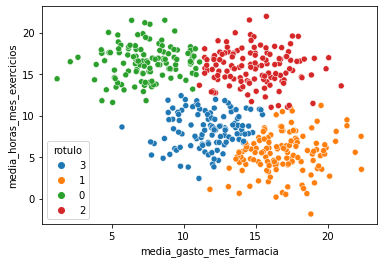

In [137]:
sns.scatterplot(data=df, x='media_gasto_mes_farmacia', y='media_horas_mes_exercicios', hue='rotulo');

Análise de grupos

## Alterar rótulos gerados para nomes sugestivos

In [138]:
mapeamento = {
    '0': 'crônicos',
    '1': 'sedentárias',
    '2': 'fit',
    '3': 'normais'
}

df['rotulo'] = df['rotulo'].map(mapeamento)

Visualizar gráfico com rótulos alterados

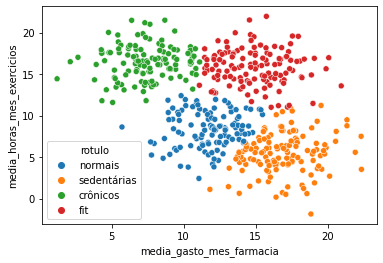

In [139]:
sns.scatterplot(data=df, x='media_gasto_mes_farmacia', y='media_horas_mes_exercicios', hue='rotulo');